
# Code


# Set up

Start importing all the packages with the environment sdsc

In [13]:
import warnings

import geopandas
import libpysal
import momepy
import osmnx
import pandas
import contextily as cx


from clustergram import Clustergram

import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

Define the place of study and show

In [276]:
place = 'Castellon de la Plana, Spain'

#ETRS89 / UTM zone 30N - EPSG: 25830
local_crs = 25830

In [277]:
#see where
geopandas.tools.geocode(place).explore()

# Extract data: using osmnx

First we add the polygon of UJI that we created manually using QGIS.

In [77]:
#open uji polygon
uji_polygon = geopandas.read_file("ujipolygon/uji.shp")


In [78]:
#extract just the polygon
poly = uji_polygon.loc[0]['geometry']

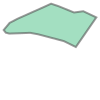

In [79]:
#plot polygon
poly

## Extracting UJI Features

In [278]:
#These are the tags we think are important for the experiment

#Tag -- (Column) important

#building -- name
#amenity -- amenity
#Emergency - no hay
#Healtcare - no hay
#Highway - no queremos
#leisure -- leisure
#natural -- natural
#office
#public_transport -- public_transport
#shop -- shop
#sport -- sport
#tourism -- tourism
#water - no hay
#waterway - no hay

In [279]:
#extraxt all ujifeature from these tags
uji_features = osmnx.geometries.geometries_from_polygon(poly, tags={'waterway':True, 'tourism':True, 'sport':True, 'shop':True, 'public_transport':True, 'office':True, 'natural':True, 'leisure':True, 'amenity':True, 'building':True})

In [280]:
#visualize
uji_features.explore()

In [281]:
#show geodataframe
uji_features.head()

amenity                 name              name:ca  \
element_type osmid                                                             
node         238477609  university  Univeristat Jaume I  Univeristat Jaume I   
             260778244         NaN  Universitat Jaume I                  NaN   
             261032465     toilets                  NaN                  NaN   
             261042988    fountain                  NaN                  NaN   
             261591364    fountain                  NaN                  NaN   

                                    name:es                   geometry bench  \
element_type osmid                                                             
node         238477609  Universidad Jaume I  POINT (-0.06898 39.99463)   NaN   
             260778244                  NaN  POINT (-0.06855 39.99435)   yes   
             261032465                  NaN  POINT (-0.06898 39.99527)   NaN   
             261042988                  NaN  POINT (-0.06888 39.99289)   NaN   
             261591364                  NaN  POINT (-0.06843 39.99356)   NaN   

                        bus   highway public_transport   railway  ...  \
element_type osmid                                                ...   
node         238477609  NaN       NaN              NaN       NaN  ...   
             260778244  yes  bus_stop         platform  platform  ...   
             261032465  NaN       NaN              NaN       NaN  ...   
             261042988  NaN       NaN              NaN       NaN  ...   
             261591364  NaN       NaN              NaN       NaN  ...   

                       addr:postcode addr:street wikipedia building:levels  \
element_type osmid                                                           
node         238477609           NaN         NaN       NaN             NaN   
             260778244           NaN         NaN       NaN             NaN   
             261032465           NaN         NaN       NaN             NaN   
             261042988           NaN         NaN       NaN             NaN   
             261591364           NaN         NaN       NaN             NaN   

                       intermittent waterway office email ways type  
element_type osmid                                                   
node         238477609          NaN      NaN    NaN   NaN  NaN  NaN  
             260778244          NaN      NaN    NaN   NaN  NaN  NaN  
             261032465          NaN      NaN    NaN   NaN  NaN  NaN  
             261042988          NaN      NaN    NaN   NaN  NaN  NaN  
             261591364          NaN      NaN    NaN   NaN  NaN  NaN  

[5 rows x 58 columns]

In [283]:
#see types and amount of geometries
uji_features.geom_type.value_counts()

Polygon       128
Point          78
LineString      1
dtype: int64

In [284]:
#take out Linestring type, just to have Polygon and Point
uji_features = uji_features[uji_features.geom_type != "LineString"]

In [285]:
#clean gdf to just have important fields and prevent errors
uji_features = uji_features[['name','amenity','leisure','natural','public_transport','shop','tourism','geometry']].reset_index(drop=True)

#building -- name
#amenity -- amenity
#Emergency - no hay
#Healtcare - no hay
#Highway - no queremos
#leisure -- leisure
#natural -- natural
#office
#public_transport -- public_transport
#shop -- shop
#sport -- sport
#tourism -- tourism
#water - no hay
#waterway - no hay

In [286]:
#show
uji_features.head()

,name,amenity,leisure,natural,public_transport,shop,tourism,geometry
0,Univeristat Jaume I,university,NaN,NaN,NaN,NaN,NaN,POINT (-0.06898 39.99463)
1,Universitat Jaume I,NaN,NaN,NaN,platform,NaN,NaN,POINT (-0.06855 39.99435)
2,NaN,toilets,NaN,NaN,NaN,NaN,NaN,POINT (-0.06898 39.99527)
3,NaN,fountain,NaN,NaN,NaN,NaN,NaN,POINT (-0.06888 39.99289)
4,NaN,fountain,NaN,NaN,NaN,NaN,NaN,POINT (-0.06843 39.99356)


In [287]:
#project geodataframe
uji_features.to_crs(local_crs)

,name,amenity,leisure,natural,public_transport,shop,tourism,geometry
0,Univeristat Jaume I,university,NaN,NaN,NaN,NaN,NaN,POINT (750229.355 4431276.706)
1,Universitat Jaume I,NaN,NaN,NaN,platform,NaN,NaN,POINT (750267.664 4431246.660)
2,NaN,toilets,NaN,NaN,NaN,NaN,NaN,POINT (750227.412 4431347.969)
3,NaN,fountain,NaN,NaN,NaN,NaN,NaN,POINT (750244.745 4431084.114)
4,NaN,fountain,NaN,NaN,NaN,NaN,NaN,POINT (750280.379 4431159.259)
...,...,...,...,...,...,...,...,...
201,NaN,NaN,garden,NaN,NaN,NaN,NaN,"POLYGON ((750465.206 4431039.049, 750462.906 4..."
202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((750080.339 4430948.733, 750046.404 4..."
203,Walhalla,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((749764.711 4431461.007, 749793.433 4..."
204,Pistes Servei d'Esports,NaN,track,NaN,NaN,NaN,NaN,"POLYGON ((749860.061 4431303.582, 749850.139 4..."


In [288]:
#index gdf
indexing = range(len(uji_features))
uji_features.insert(0,"ID",indexing)

In [289]:
#export

#export to a GPK
uji_features.to_file('uji_features.gpkg', driver='GPKG', layer='uji_features')  

#export to a GeoJson
uji_features.to_file('uji_features.geojson', driver='GeoJSON') 